In [ ]:
#!pip install langchain langgraph cassio langchain_community tiktoken langchain-groq langchainhub langchain_huggingface arxiv wikipedia python-dotenv

  Using cached langchain-0.3.22-py3-none-any.whl.metadata (7.8 kB)
  Using cached cassio-0.1.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached langchain_community-0.3.20-py3-none-any.whl.metadata (2.4 kB)
  Using cached tiktoken-0.9.0-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached langchain_groq-0.3.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached langchainhub-0.1.21-py3-none-any.whl.metadata (659 bytes)
  Using cached langchain_huggingface-0.1.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached arxiv-2.1.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached wikipedia-1.4.0-py3-none-any.whl
  Using cached python_dotenv-1.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached langchain_core-0.3.50-py3-none-any.whl.metadata (5.9 kB)
  Using cached langchain_text_splitters-0.3.7-py3-none-any.whl.metadata (1.9 kB)
  Using cached langsmith-0.3.24-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.2-py3-none-any.whl.metadata (64 kB)
  Using cached sqlalchemy-2.0.40-

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
import cassio
# connection of Astra DB
ASTRA_DB_APPLICATION_TOKEN = os.getenv("ASTRA_DB_APPLICATION_TOKEN")
ASTRA_DB_ID = os.getenv("ASTRA_DB_ID")

cassio.init(
    token = ASTRA_DB_APPLICATION_TOKEN,
    database_id = ASTRA_DB_ID
)

In [3]:
# Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

urls = [
    "https://www.acefitness.org/resources/everyone/exercise-library/190/chin-ups/",
    "https://www.acefitness.org/resources/everyone/exercise-library/11/back-squat/",
    "https://www.acefitness.org/resources/everyone/exercise-library/12/bent-over-row/",
    "https://www.acefitness.org/resources/everyone/exercise-library/24/push-press/"
]

docs = [WebBaseLoader(url).load() for url in urls]
doc_list = [item for sublist in docs for item in sublist]
print(doc_list)

# traditional way
# text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 0)

# using tiktoken
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size = 500, chunk_overlap = 0)

docs_split = text_splitter.split_documents(doc_list)

USER_AGENT environment variable not set, consider setting it to identify your requests.


[Document(metadata={'source': 'https://www.acefitness.org/resources/everyone/exercise-library/190/chin-ups/', 'title': 'Arm Exercises | Chin-ups ', 'description': 'Step 1\r\nStarting Position: Stand under the chin-up bar and reach your arms overhead with your palms facing you.\xa0 Reach, jump or lift your body off the floo', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nArm Exercises | Chin-ups \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAsset 19\nangle-down-bold\nangle-left-bold\nangle-right-bold\nangle-up-bold\n\n\n\nAsset 10\n\n\n\n\n\ncertifications\n\nAsset 14\n\n\n\n\nclose-bold\nclose\n\n\n\n\n\nAsset 8\n\nAsset 12\n\n\n\n\nmenu\nAsset 18\nAsset 17\nAsset 6\n\nAsset 16\n\n\n\n\n\n\n\n\nAsset 9\nAsset 15\nAsset 11\n\n\nAsset 13\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nACE Fitness\n\n\n\n\n\n\r\n                            Certification \n\n\n\n\n\n\r\n                            Continuing\r\n                           

In [4]:
docs_split

[Document(metadata={'source': 'https://www.acefitness.org/resources/everyone/exercise-library/190/chin-ups/', 'title': 'Arm Exercises | Chin-ups ', 'description': 'Step 1\r\nStarting Position: Stand under the chin-up bar and reach your arms overhead with your palms facing you.\xa0 Reach, jump or lift your body off the floo', 'language': 'en'}, page_content='Arm Exercises | Chin-ups \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAsset 19\nangle-down-bold\nangle-left-bold\nangle-right-bold\nangle-up-bold\n\n\n\nAsset 10\n\n\n\n\n\ncertifications\n\nAsset 14\n\n\n\n\nclose-bold\nclose\n\n\n\n\n\nAsset 8\n\nAsset 12\n\n\n\n\nmenu\nAsset 18\nAsset 17\nAsset 6\n\nAsset 16\n\n\n\n\n\n\n\n\nAsset 9\nAsset 15\nAsset 11\n\n\nAsset 13\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nACE Fitness\n\n\n\n\n\n\r\n                            Certification \n\n\n\n\n\n\r\n                            Continuing\r\n                            Education \n\n\n\n\n\n\r\n       

In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

c:\Users\amcco\BuffAggie\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from langchain.vectorstores import Cassandra
astra_vector_store = Cassandra(embedding=embeddings,
                               table_name = "buff_aggie_exercises",
                               session=None,
                               keyspace=None)

In [7]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print(f"Inserted {len(docs_split)} headlines")
astra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 36 headlines


In [8]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("Give me a cookie recipe")

[Document(id='730eabbda8404509911d1414f5b54874', metadata={'description': 'Step 1\r\nStarting Position: Stand under the chin-up bar and reach your arms overhead with your palms facing you.\xa0 Reach, jump or lift your body off the floo', 'language': 'en', 'source': 'https://www.acefitness.org/resources/everyone/exercise-library/190/chin-ups/', 'title': 'Arm Exercises | Chin-ups '}, page_content='Arm Exercises | Chin-ups \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAsset 19\nangle-down-bold\nangle-left-bold\nangle-right-bold\nangle-up-bold\n\n\n\nAsset 10\n\n\n\n\n\ncertifications\n\nAsset 14\n\n\n\n\nclose-bold\nclose\n\n\n\n\n\nAsset 8\n\nAsset 12\n\n\n\n\nmenu\nAsset 18\nAsset 17\nAsset 6\n\nAsset 16\n\n\n\n\n\n\n\n\nAsset 9\nAsset 15\nAsset 11\n\n\nAsset 13\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nACE Fitness\n\n\n\n\n\n\r\n                            Certification \n\n\n\n\n\n\r\n                            Continuing\r\n                      

In [9]:
# langgraph application
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate,PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import StrOutputParser


c:\Users\amcco\BuffAggie\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3549: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
# Data model
class RouteQuery(BaseModel):
  """Route a user query to the most relevant datasource"""
  datasource: Literal["vectorstore","wiki_search"] = Field(
      ...,
      description="Given a user question choose to route it to wikipedia or a vectorstore"
  )

In [11]:
from langchain_groq import ChatGroq
# from google.colab import userdata
import os
groq_api_key = os.getenv('groq_api_key')
# print(groq_api_key)

In [12]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name='Llama-3.3-70b-Versatile')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000020AB59B9DD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000020AB59C0950>, model_name='Llama-3.3-70b-Versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [13]:
structured_llm_router=llm.with_structured_output(RouteQuery)

In [14]:
# Prompt
system = """You are an expert at routing a user question to a vectorstore or wikipedia.
The vectorstore contains documents related to baking.
Use the vectorstore for questions on these topics. Otherwise, use wiki-search."""
route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | structured_llm_router
print(
    question_router.invoke(
        {"question": "what is stardew Valley"}
    )
)
print(question_router.invoke({"question": "How to make a sweet dessert"}))

datasource='wiki_search'
datasource='vectorstore'


In [15]:
# summarize Prompt
summarize_prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are an assistant for question-answering tasks.
    Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know.
    Use three sentences maximum and keep the answer concise <|eot_id|><|start_header_id|>user<|end_header_id|>
    Question: {question}
    Context: {documents}
    Answer: <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["question", "documents"],
)

summarize_chain = summarize_prompt | llm | StrOutputParser()

In [16]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)


In [17]:
wiki.run("crab")

'Page: Crab\nSummary: Crabs are decapod crustaceans of the infraorder Brachyura (meaning "short tail" in Greek), which typically have a very short projecting tail-like abdomen, usually hidden entirely under the thorax. They live in all the world\'s oceans, in freshwater, and on land. They are generally covered with a thick exoskeleton. They generally have five pairs of legs, and they have pincer claws on the ends of the frontmost pair. They first appeared during the Jurassic period, around 200 mill'

In [18]:
## Graph

from typing import List

from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [19]:
from langchain.schema import Document

def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}

In [20]:
def generate(state):
    """
    Generate LLM response

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # Generate
    generation = summarize_chain.invoke({"question": question, "documents": documents})
    return {"generation": generation, "question": question, "documents": documents}

In [21]:
def wiki_search(state):
    """
    wiki search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """

    print("---wikipedia---")
    print("---HELLO--")
    question = state["question"]
    print(question)

    # Wiki search
    docs = wiki.invoke({"query": question})
    #print(docs["summary"])
    wiki_results = docs
    wiki_results = Document(page_content=wiki_results)

    return {"documents": wiki_results, "question": question}

In [22]:
### Edges ###


def route_question(state):
    """
    Route question to wiki search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})
    if source.datasource == "wiki_search":
        print("---ROUTE QUESTION TO Wiki SEARCH---")
        return "wiki_search"
    elif source.datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"
    else:
        raise ValueError(f"Unknown datasource: {source.datasource}")

In [23]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)
# Define the nodes
workflow.add_node("wiki_search", wiki_search)  # web search
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("generate", generate)  # generate

# Build graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "wiki_search": "wiki_search",
        "vectorstore": "retrieve",
    },
)
workflow.add_edge( "retrieve", "generate")
workflow.add_edge( "generate",END)
workflow.add_edge( "wiki_search", END)
# Compile
app = workflow.compile()

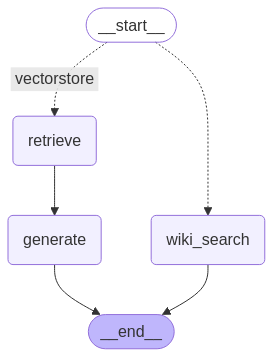

In [24]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [25]:
from pprint import pprint

# Run
inputs = {
    "question": "What is how to bake a cookie?"
}
config = {"configurable":{"thread_id":"1"}}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'][0].dict()['metadata']['description'])
pprint(value['generation'])

---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('Step 1\r\n'
 'Starting Position: Stand under the chin-up bar and reach your arms overhead '
 'with your palms facing you.\xa0 Reach, jump or lift your body off the floo')
("I don't know how to bake a cookie as the provided context does not contain "
 'any information about baking cookies. The context appears to be related to '
 'fitness exercises.')


C:\Users\amcco\AppData\Local\Temp\ipykernel_16992\2229243983.py:17: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(value['documents'][0].dict()['metadata']['description'])


In [26]:
from pprint import pprint

# Run
inputs = {
    "question": "Avengers"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'])

---ROUTE QUESTION---
---ROUTE QUESTION TO Wiki SEARCH---
---wikipedia---
---HELLO--
Avengers
"Node 'wiki_search':"
'\n---\n'
Document(metadata={}, page_content='Page: Avengers: Endgame\nSummary: Avengers: Endgame is a 2019 American superhero film based on the Marvel Comics superhero team the Avengers. Produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures, it is the direct sequel to Avengers: Infinity War (2018) and the 22nd film in the Marvel Cinematic Universe (MCU). Directed by Anthony and Joe Russo and written by Christopher Markus and Stephen McFeely, the film features an ensemble cast which includes Robert Downey Jr., Chr')
